In [12]:
# Directory containing the files
dir_path = '15percent'
suff = 'gin'

In [13]:
import pandas as pd
import os

def combine_and_clean(directory_path = '15percent', datasetname = 'congress'):
    all_files = os.listdir(directory_path)

    # select only the files that end with given suffix
    selected_files = [f for f in all_files if f.startswith(datasetname) and f.endswith(suff)]

    # Read each file into a dataframe and store them in a dictionary with file names as keys
    dfs = {f: pd.read_csv(os.path.join(directory_path, f), header=None) for f in selected_files}

    # Concatenate all dataframes into one, using file names as column headers
    combined_df = pd.concat(dfs, axis=1)

    # only keep the first 30 rows
    combined_df = combined_df.iloc[:30]

    # To have only file names as top-level column headers (removing multi-level indexing)
    combined_df.columns = [col[0] for col in combined_df.columns]

    # Create a dictionary to map old column names to new names
    column_mapping = {
        f'{datasetname}.wagner.node2vec.{suff}': 'n2v',
        f'{datasetname}.wagner.nodesim.{suff}': 'nodesim',
        f'{datasetname}.wagner.fairwalk.{suff}': 'fairwalk',
        f'{datasetname}.wagner.ulocal_fair_ppr.{suff}': 'u-ppr',
        f'{datasetname}.wagner.crosswalk.{suff}': 'crosswalk',
        f'{datasetname}.wagner.minwalk.{suff}': 'minwalk'
    }


    # Filter the DataFrame to keep only the columns listed in the dictionary that exist in the DataFrame
    existing_columns = [col for col in column_mapping.keys() if col in combined_df.columns]
    combined_df_clean = combined_df[existing_columns].copy()

    # Rename the columns as per the mapping
    combined_df_clean.rename(columns=column_mapping, inplace=True)


    # # Filter the DataFrame to keep only the columns listed in the dictionary
    # combined_df_clean = combined_df[list(column_mapping.keys())]

    # # Rename the columns using the dictionary
    # combined_df_clean = combined_df_clean.rename(columns=column_mapping)

    # replace any zeros with mean of the column
    combined_df_clean = combined_df_clean.replace(0, combined_df_clean.mean())

    # Now, combined_df contains the desired columns in the specified order with the new names
    return combined_df_clean

In [14]:
import matplotlib.pyplot as plt

def plot_suff(dataframes, dataset_names, ylabel='Visibility'):
    # Create a 2x3 grid of subplots
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Define a color mapping for each column
    color_mapping = {
        'n2v': 'blue', 
        'nodesim': 'green', 
        'fairwalk': 'red', 
        'u-ppr': 'cyan', 
        'crosswalk': 'darkorange', 
        'minwalk': 'magenta',
        # Add more if there are more columns
    }

    # Plot each dataframe on a separate subplot
    for i, df in enumerate(dataframes):
        row = i // 3
        col = i % 3

        for column in df.columns:
            color = color_mapping.get(column, 'gray')  # Default to gray if column not in mapping
            axes[row, col].plot(df.index[5:], df[column][5:], label=column, linewidth=2, color=color)

        # Set custom x-axis label with dataset name in parentheses
        axes[row, col].set_xlabel(f'Iterations ({dataset_names[i]})', fontsize=16)
        axes[row, col].set_ylabel(ylabel, fontsize=14)

        # Show legend only in the first chart
        if i == 0:
            axes[row, col].legend(loc='upper right')  # Place the legend inside the first chart

        # Remove titles for all charts
        axes[row, col].set_title('')

        # Increase font size of tick labels on x and y axes
        axes[row, col].tick_params(axis='both', labelsize=16)

        # Set y-axis limits to [0, 1.0]
        axes[row, col].set_ylim([0, 1.0])

    # Adjust spacing between subplots
    plt.tight_layout()

    # Save the figure as a PDF
    plt.savefig(f'plot.{dir_path}.{suff}.pdf', format='pdf')

    # Show the plots
    plt.show()


In [15]:
import matplotlib.pyplot as plt

def plot_suff(dataframes, dataset_names, ylabel='Visibility'):
    # Define the number of rows and columns for the subplot grid
    n_rows = 1
    n_cols = len(dataframes)

    # Create a grid of subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, 4))  # Adjust figsize for square subplots

    # Define a color mapping for each column
    color_mapping = {
        'n2v': 'blue', 
        'nodesim': 'green', 
        'fairwalk': 'red', 
        'u-ppr': 'cyan', 
        'crosswalk': 'darkorange', 
        'minwalk': 'magenta',
        # Add more if there are more columns
    }

    # Plot each dataframe on a separate subplot
    for i, df in enumerate(dataframes):
        ax = axes[i] if n_cols > 1 else axes  # Handle single subplot case

        for column in df.columns:
            color = color_mapping.get(column, 'gray')  # Default to gray if column not in mapping
            ax.plot(df.index[5:], df[column][5:], label=column, linewidth=2, color=color)

        ax.set_xlabel(f'Iterations ({dataset_names[i]})', fontsize=13)  # Adjust fontsize
        if i == 0:  # Only the first subplot gets the y-axis label
            ax.set_ylabel(ylabel, fontsize=13)
        
        if i == 0:
            ax.legend(loc='upper right', fontsize=10)  # Smaller font for legend

        ax.set_title('')
        ax.tick_params(axis='both', labelsize=12)
        ax.set_ylim([0, 1.0])

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Save the figure as a PDF with the specified filename format
    plt.savefig(f'plot.{dir_path}.{suff}.pdf', format='pdf')

    # Show the plots
    plt.show()


        n2v   nodesim  fairwalk     u-ppr  crosswalk   minwalk
0  0.541413  0.541413  0.541413  0.541413   0.541413  0.541413
1  0.532842  0.532341  0.532993  0.537066   0.534848  0.534476
2  0.525788  0.524463  0.525798  0.533102   0.529125  0.528359
3  0.519589  0.517811  0.519624  0.529657   0.522682  0.522990
4  0.514340  0.512346  0.514549  0.526579   0.516881  0.517871


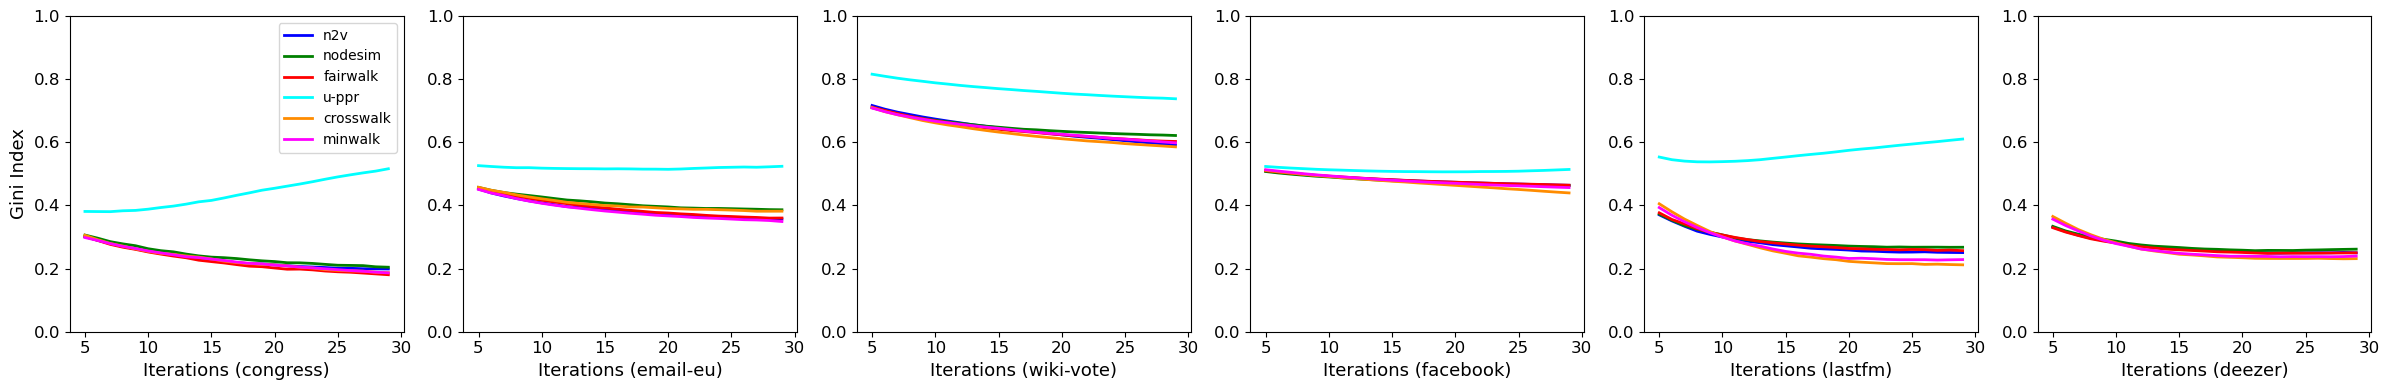

In [16]:
congress_suff = combine_and_clean(directory_path=dir_path, datasetname = 'congress')
email_eu_suff = combine_and_clean(directory_path=dir_path, datasetname = 'email_eu')
wiki_vote_suff = combine_and_clean(directory_path=dir_path, datasetname = 'wiki_vote')
facebook_suff = combine_and_clean(directory_path=dir_path, datasetname = 'facebook')
lastfm_suff = combine_and_clean(directory_path=dir_path, datasetname = 'lastfm')
deezer_suff = combine_and_clean(directory_path=dir_path, datasetname = 'deezer')


dataframes = [congress_suff, email_eu_suff, wiki_vote_suff, 
              facebook_suff, lastfm_suff, deezer_suff]

# Dataset names in order
dataset_names = ['congress', 'email-eu', 'wiki-vote', 'facebook', 'lastfm', 'deezer']

print(facebook_suff.head())

if suff == 'vis':
    plot_suff(dataframes, dataset_names, ylabel='Visibility')

if suff == 'gin':
    plot_suff(dataframes, dataset_names, ylabel='Gini Index')

if suff == 'clu':
    plot_suff(dataframes, dataset_names, ylabel='Clustering Coefficient')
